# Detect Counterfeit Notes

### Import the libraries that we will need for this project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition, preprocessing, linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score, r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
# Import functions created by OpenClassroom
from functions import *
data = pd.read_csv("notes.csv")

## The dataset

In [2]:
data = data.map(lambda x: np.nan if x == np.inf else x)
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [3]:
# verifying null values. There is no column with null value.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


## Task 1: Describe the data at hand with univariate and bivariate analyses.

### Univariate Analysis

#### Summary Statistics

In [4]:
# A quick summary statistics for false notes data. Unit is in mm.
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


#### Visualize with boxplots

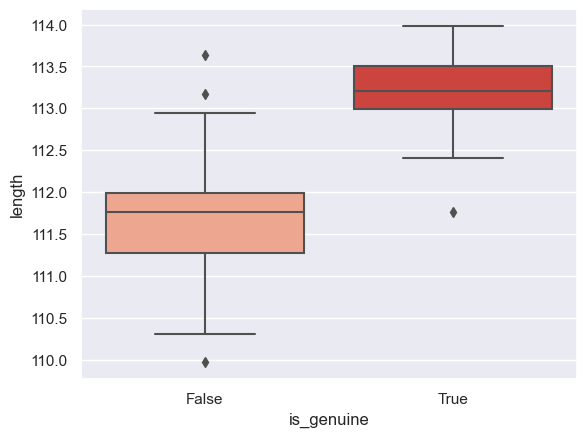

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")
df = data

sns.boxplot(x=df["is_genuine"], y=df["length"], palette="Reds")
plt.show()

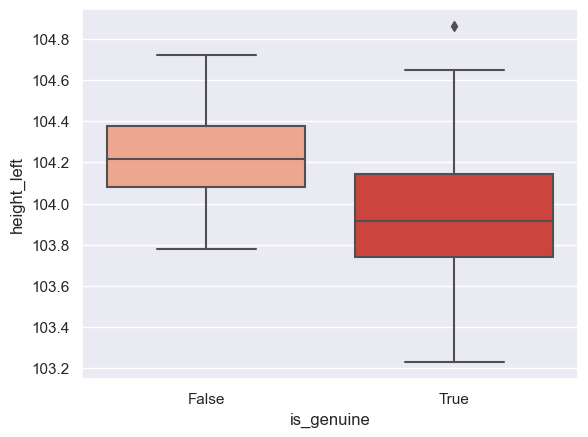

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")
df = data

sns.boxplot(x=df["is_genuine"], y=df["height_left"], palette="Reds")
plt.show()

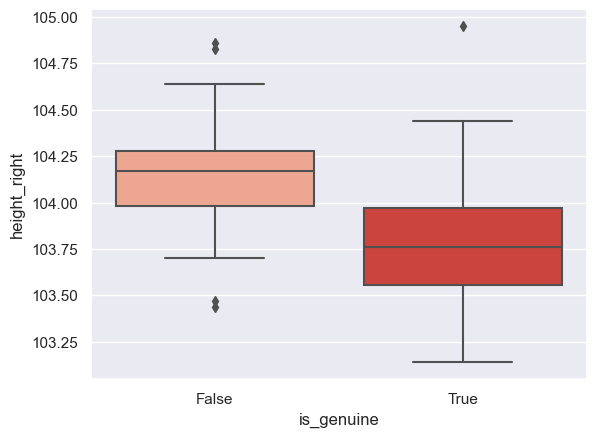

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")
df = data

sns.boxplot(x=df["is_genuine"], y=df["height_right"], palette="Reds")
plt.show()

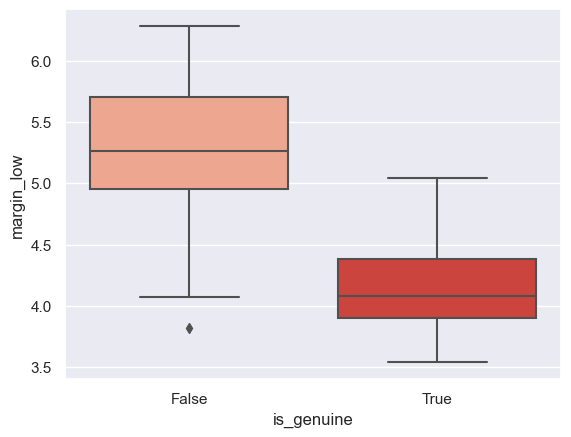

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")
df = data

sns.boxplot(x=df["is_genuine"], y=df["margin_low"], palette="Reds")
plt.show()

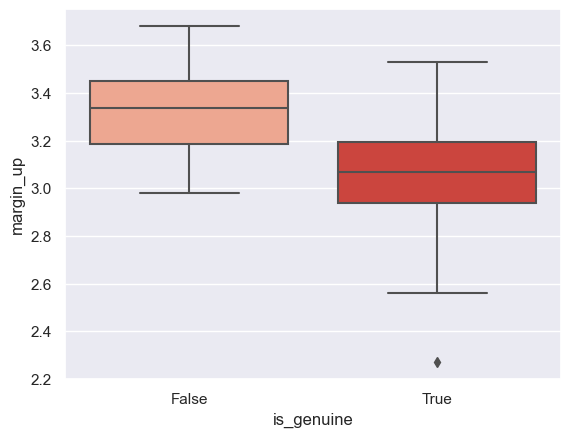

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")
df = data

sns.boxplot(x=df["is_genuine"], y=df["margin_up"], palette="Reds")
plt.show()

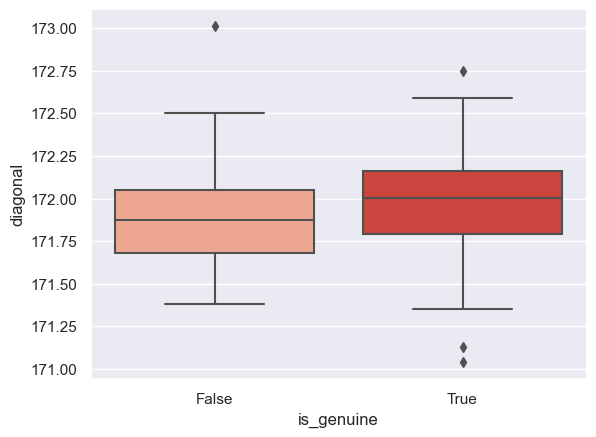

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")
df = data

sns.boxplot(x=df["is_genuine"], y=df["diagonal"], palette="Reds")
plt.show()

### Univariate histogram

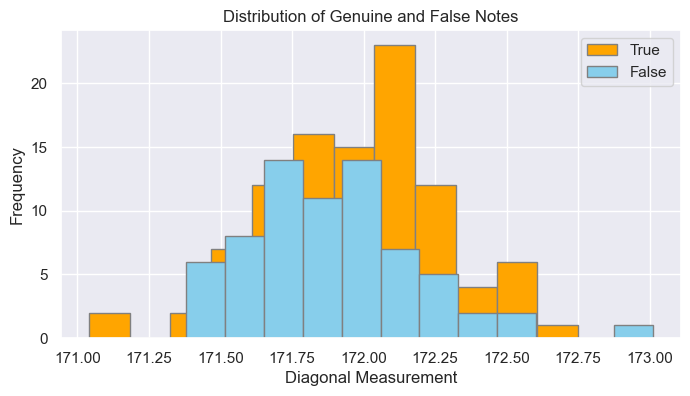

In [11]:
# Get group names and define colors
group_name = data['is_genuine'].unique()
colors = ['orange', 'skyblue']

# Plot the histograms
for i, group in enumerate(group_name):
    ax = data[data['is_genuine']==group]['diagonal'].hist(figsize=(8, 4),
                                        edgecolor='gray',
                                        bins=12,
                                        color=colors[i]
                                       )

# Add a legend
ax.legend(group_name)

# Add a title and axis label
ax.set_title('Distribution of Genuine and False Notes')
ax.set_xlabel('Diagonal Measurement')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

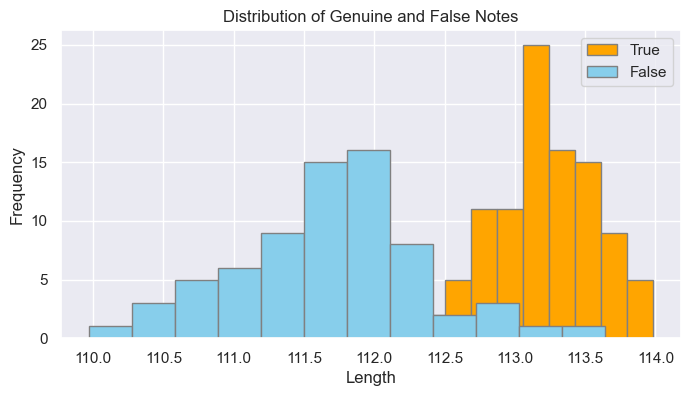

In [12]:
# Get group names and define colors
group_name = data['is_genuine'].unique()
colors = ['orange', 'skyblue']

# Plot the histograms
for i, group in enumerate(group_name):
    ax = data[data['is_genuine']==group]['length'].hist(figsize=(8, 4),
                                        edgecolor='gray',
                                        bins=12,
                                        color=colors[i]
                                       )

# Add a legend
ax.legend(group_name)

# Add a title and axis label
ax.set_title('Distribution of Genuine and False Notes')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

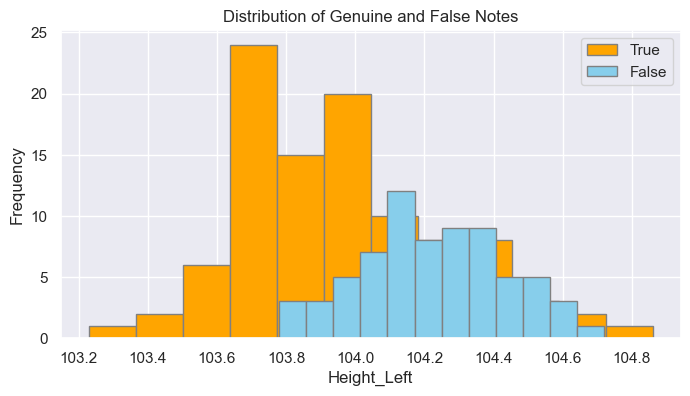

In [13]:
# Get group names and define colors
group_name = data['is_genuine'].unique()
colors = ['orange', 'skyblue']

# Plot the histograms
for i, group in enumerate(group_name):
    ax = data[data['is_genuine']==group]['height_left'].hist(figsize=(8, 4),
                                        edgecolor='gray',
                                        bins=12,
                                        color=colors[i]
                                       )

# Add a legend
ax.legend(group_name)

# Add a title and axis label
ax.set_title('Distribution of Genuine and False Notes')
ax.set_xlabel('Height_Left')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

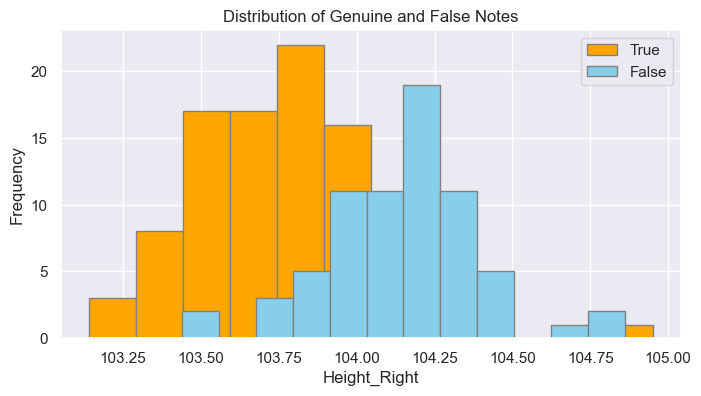

In [14]:
# Get group names and define colors
group_name = data['is_genuine'].unique()
colors = ['orange', 'skyblue']

# Plot the histograms
for i, group in enumerate(group_name):
    ax = data[data['is_genuine']==group]['height_right'].hist(figsize=(8, 4),
                                        edgecolor='gray',
                                        bins=12,
                                        color=colors[i]
                                       )

# Add a legend
ax.legend(group_name)

# Add a title and axis label
ax.set_title('Distribution of Genuine and False Notes')
ax.set_xlabel('Height_Right')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

### Bivariate Analysis

#### Correlogram with regression line

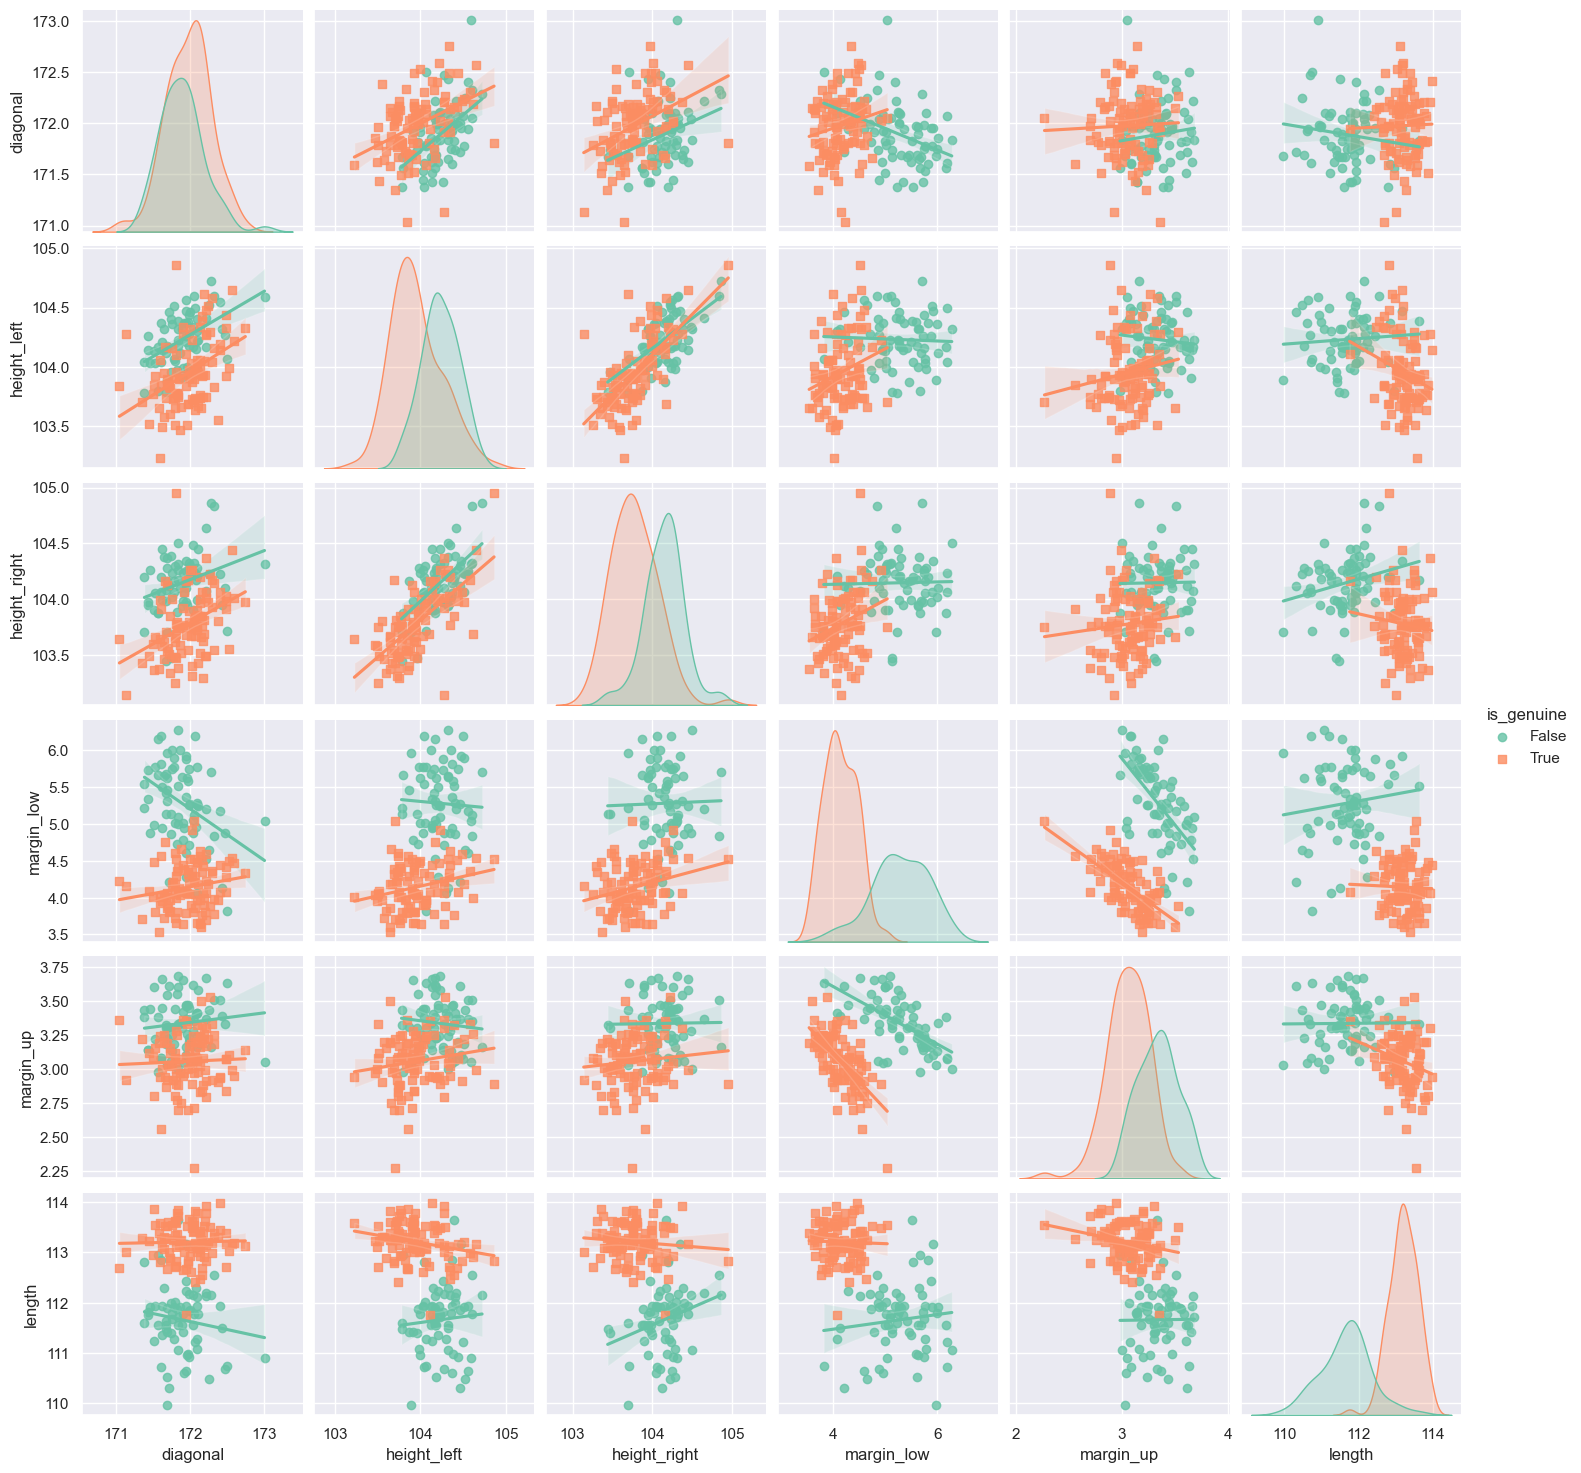

In [15]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = data
 
# left
sns.pairplot(df, kind="reg", hue="is_genuine", markers=["o", "s"], palette="Set2")
plt.show()

#### Correlation Heatmap

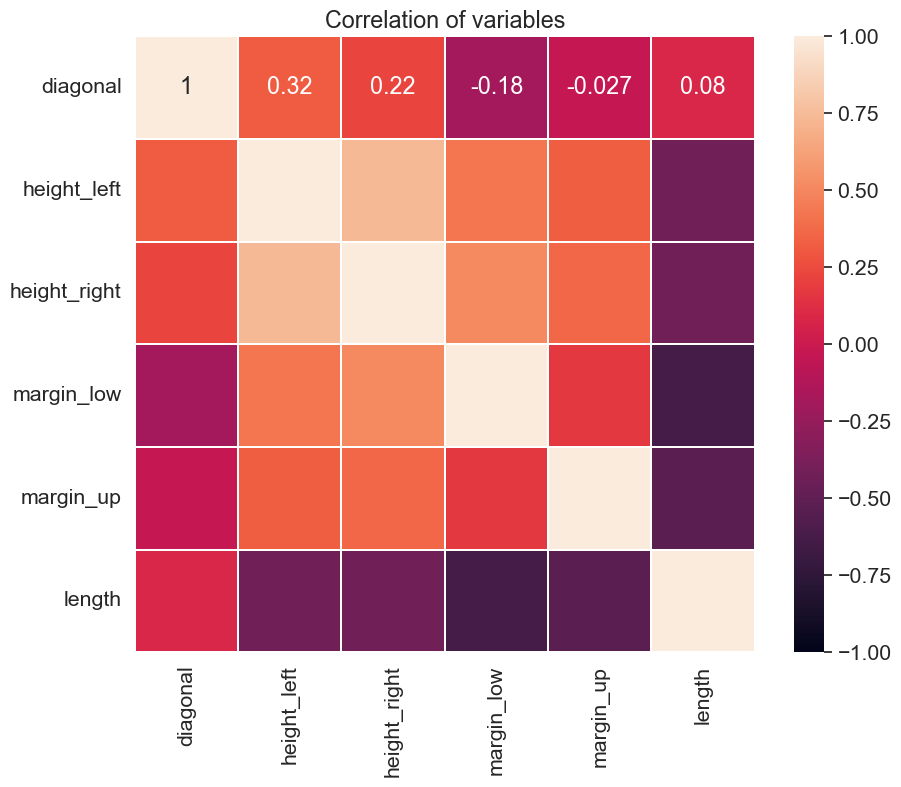

In [16]:
sns.set(rc={'figure.figsize': (10, 8)}, font_scale=1.4)
sns.heatmap(data.drop(columns=["is_genuine"]).corr(), 
            linewidths=0.05, vmin=-1, vmax=1, annot=True)

plt.title('Correlation of variables')
plt.show()

## Task 2: Principal Component Analysis

In [17]:
#### Let's load the original data
data = pd.read_csv("notes.csv")

In [18]:
X = data.set_index('is_genuine')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, True to False
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      170 non-null    float64
 1   height_left   170 non-null    float64
 2   height_right  170 non-null    float64
 3   margin_low    170 non-null    float64
 4   margin_up     170 non-null    float64
 5   length        170 non-null    float64
dtypes: float64(6)
memory usage: 8.1 KB


### Standardized the data

In [19]:
### This will standardized the data, meaning it will have a mean of 0 and a standard deviation of 1.

In [20]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
# Initiate the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

#### Plot the data after standardizing.

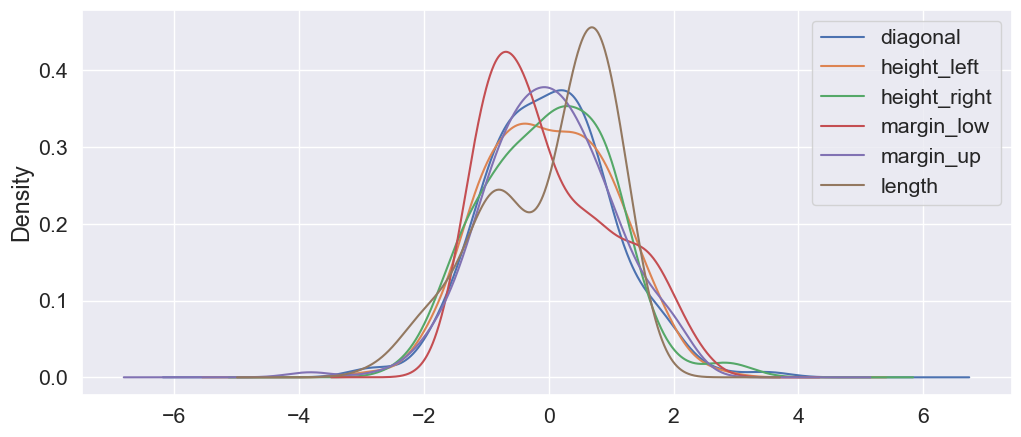

In [21]:
# Plot the density plot
X_scaled_df.plot(kind='density', sharex=True, figsize=(12, 5), layout=(1, 3))
plt.show()

### Perform the PCA

#### Perform a PCA on our standardized data.

In [22]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 6

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled)

PCA(n_components=6)

#### Analyze the results.

#### Array of the variance  of the data explained by each of the 6 principal components, starting with PC1, the principal component that explains most of the variance.

### Scree Plot.

#### The explained variance ratio in a scree plot.

In [23]:
####  Eigenvalues measure the amount of variation retained by each principal component.

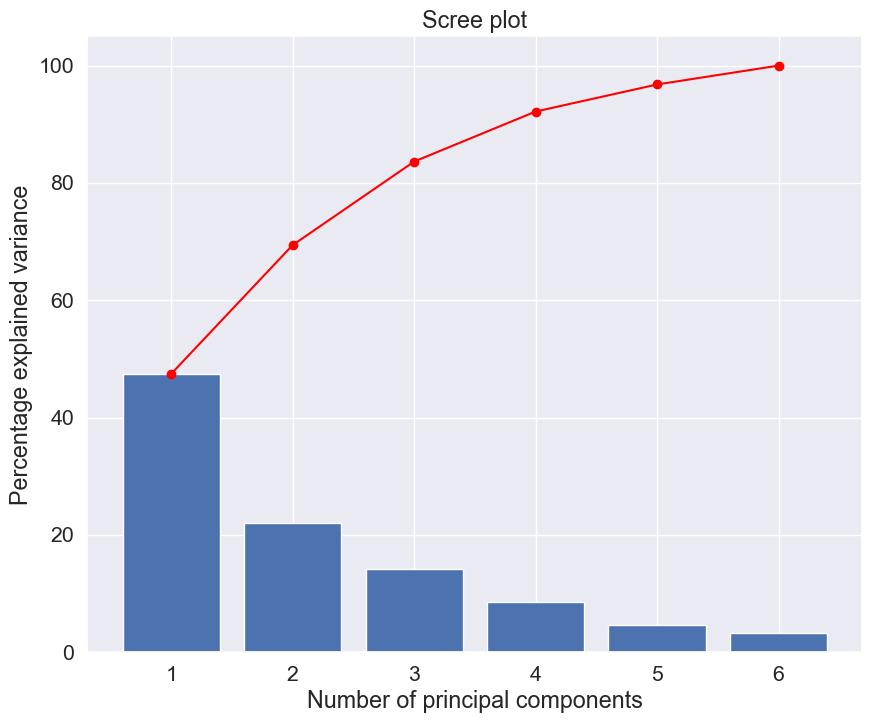

In [24]:
display_scree_plot(pca)

In [25]:
#### This shows we need just 3 out of 6 Principal Components to explain over 80% of the variance of the sample data.

In [26]:
#### Get the components from the pca object:

In [27]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc4 = pca.components_[3]
pc5 = pca.components_[4]
pc6 = pca.components_[5]

In [28]:
(pca.explained_variance_ratio_).round(2)

array([0.47, 0.22, 0.14, 0.09, 0.05, 0.03])

In [29]:
pca.explained_variance_ratio_.cumsum().round(2)

array([0.47, 0.69, 0.84, 0.92, 0.97, 1.  ])

#### PC1 shows scores of 0.47, PC2 shows 0.22, PC3 shows 0.14. Cumulative scores for this first 3 components is 0.84.

#### Each array, pc1, pc2, etc has one value or correlation 'score' for each variable. 
#### The score shows how much the variable influences the principal component. Let's remind ourselves of what columns we have in the data:

In [30]:
X.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [31]:
pc1.round(2)

array([ 0.07,  0.48,  0.49,  0.43,  0.35, -0.47])

In [32]:
pc2.round(2)

array([ 0.78,  0.34,  0.24, -0.32, -0.14,  0.31])

In [33]:
pc3.round(2)

array([-0.09,  0.12,  0.15,  0.51, -0.82,  0.13])

In [34]:
#### PC1 most influential variables are the height_left, height_right and margin_low & margin_up.
#### PC2 most influential variable is the diagonal measurement, second is height_left, third is 'Length'
#### PC3 most influential variabe is the margin_low.

#### Therefore, PC1 and PC2 are sufficient to explain the variance in the sample data.

### Correlation Circle

#### Plot these component scores on a correlation circle : PC1 against PC2:

#### Representing variables using correlation circles.

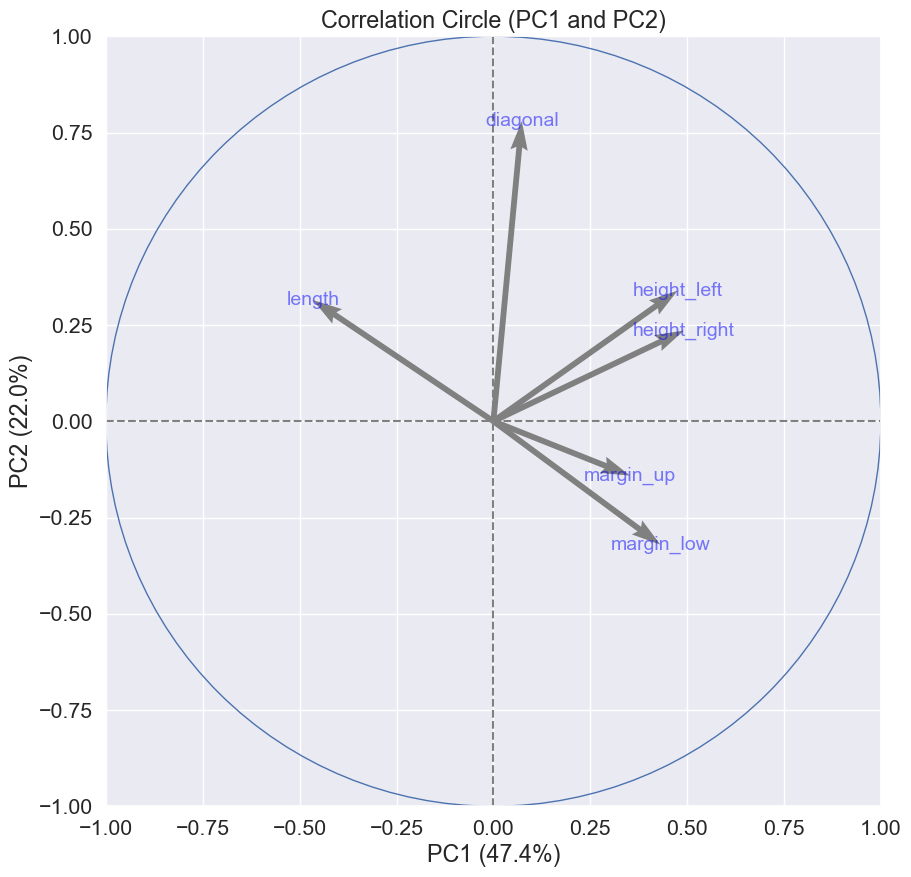

In [35]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(X.columns),)

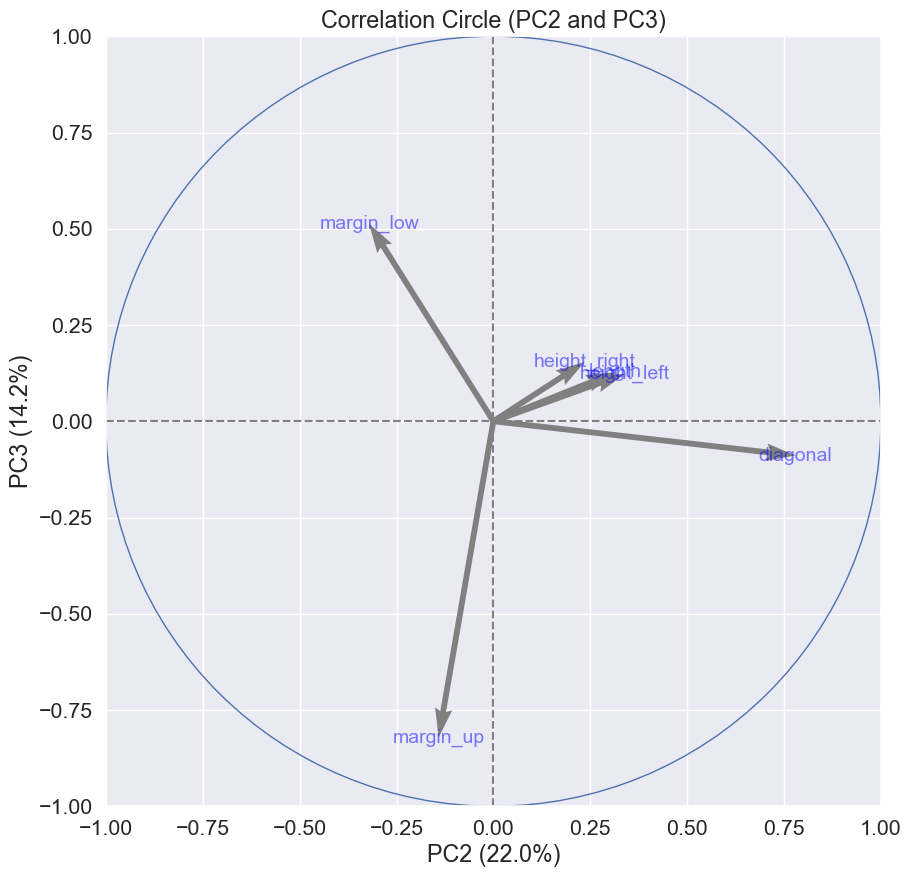

In [36]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(1,2)], labels = np.array(X.columns),)

The correlation circle can be interpreted as follow:

Positively correlated variables are grouped together.
Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
The distance between variables and the origin measures the quality of the variables on the factor map. Variables that are away from the origin are well represented on the factor map.

#### Analyzing the representation quality and the contribution of individuals.

In [37]:
#### Reminder: In sklearn the components are sorted by explained_variance_. 
#### The larger the absolute values, the more a specific feature contributes to that principal component.

#### Interpretation of the representation quality and the contribution of individuals.

#### 1. The variable 'diagonal' is well represented by PC2 as shown in the first factor map.

#### 2. The variable 'margin_low' is well represented by PC3 as shown in the subsequent factor map.

#### 3. Length and margin_low & margin_up have negative correlations in the first factorial map.

#### 4. 'height_left' and height_right' are positively correlated in the first factorial map.

### Individuals Factor Map

### Representing individuals using factorial planes.

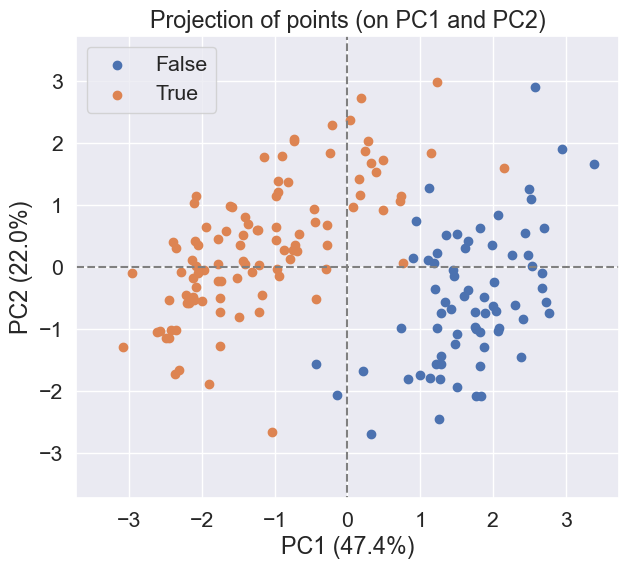

In [38]:
# Transform the original scaled data to the new vector space
X_projected = pca.transform(X_scaled) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, num_components, pca,  [
                         (0, 1)], illustrative_var=data.is_genuine)
plt.show()

#### We can observe that the projection of individuals onto the first factorial plane, which distinguishes genuine and false notes rather well

### Factor Maps for other factorial planes:

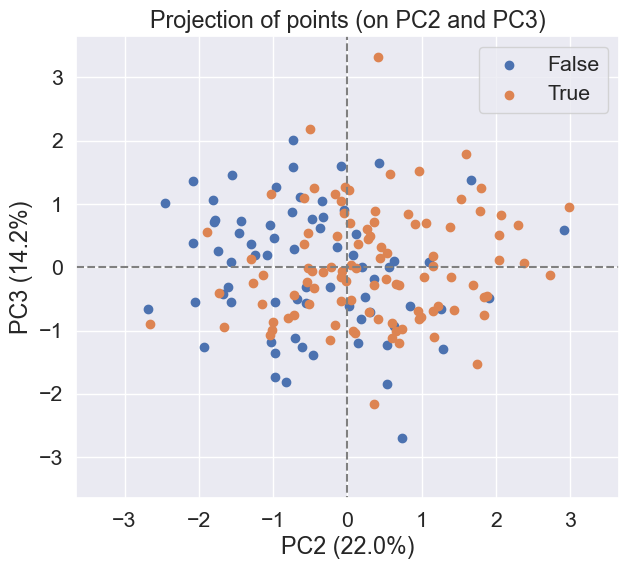

In [39]:
display_factorial_planes(X_projected, num_components, pca,  [
                         (1, 2)], illustrative_var=data.is_genuine)
plt.show()

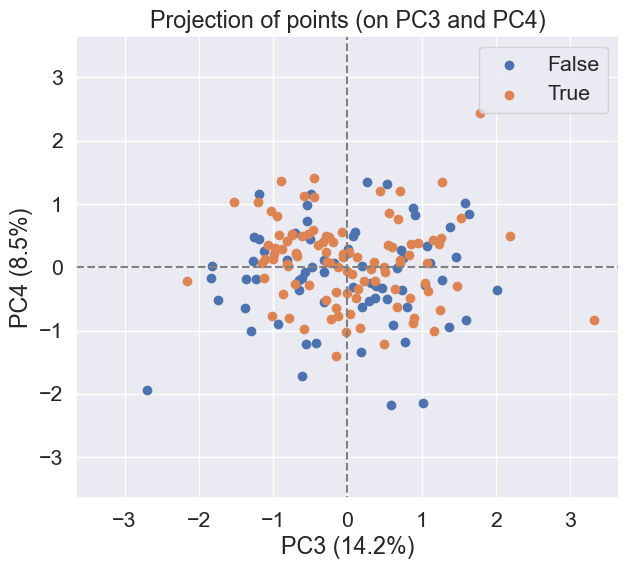

In [40]:
display_factorial_planes(X_projected, num_components, pca,  [
                         (2, 3)], illustrative_var=data.is_genuine)
plt.show()

#### The separation of the individuals in the three groups is less clear in the subsequent factorial planes, indicating how well the first factorial plane has captured the essence of the data.

## Task 3 Apply a classification algorithm and analyze the result.

### K-Means Clustering

#### k-means algorithm finds groups of similar data points in a sample. K-means clustering aims to partition a set of observations into k clusters, where each observation belongs to the cluster with the nearest mean, which is the centroid of the cluster. 

In [41]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler
X = X.fillna(X.mean()) 
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

#### Perform the k-means clustering.
We will ask for 2 clusters (the  n_clusters  parameter) and ask for clustering to be performed 10 times, starting with different centroids (this is the  n_init  parameter). 

In [42]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

#### Put cluster numbers on a new column:

In [43]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
is_genuine,,,,,,,
True,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633,0
True,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,1
True,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,1
True,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,1
True,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777,1
...,...,...,...,...,...,...,...
False,0.555689,0.550431,1.581436,0.896930,1.738009,-0.857535,0
False,3.507789,1.761301,1.157201,0.611230,-0.510944,-1.801418,0
False,1.736529,0.684972,0.520847,0.382670,0.677182,-2.050950,0


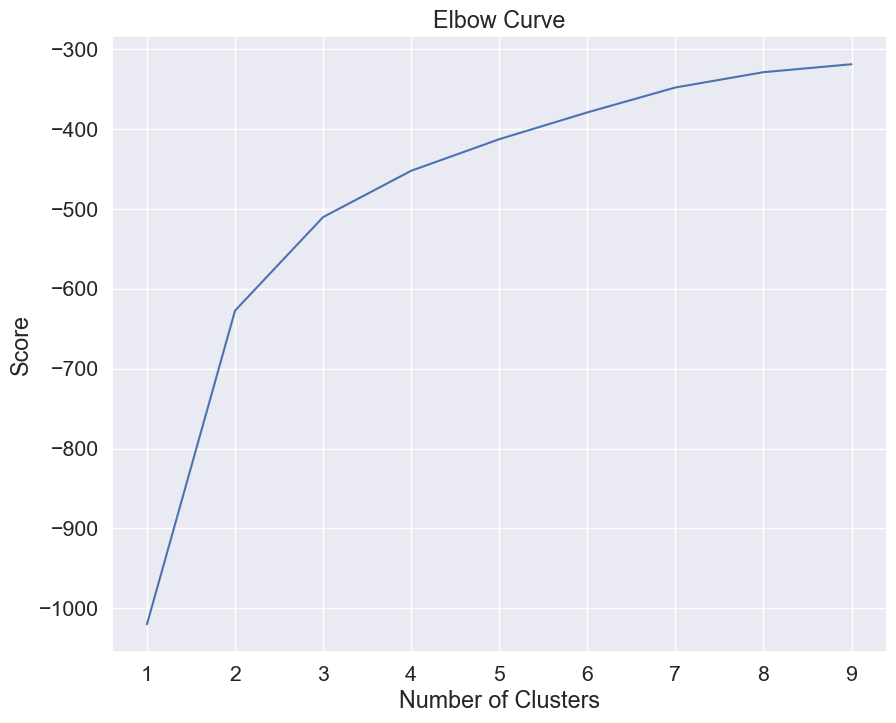

In [44]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 10
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### This shows 2 clusters is a good  number before the 'elbow' starts to flattened.

### Analyzing the Result

### Perform the PCA, asking for 2 principal components:

In [45]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

#### Confirm we have the new vector space and clusters:

In [46]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])

# clusters obtained after applying KMeans to the data
X_reduceddf['cluster'] = clusters
X_reduceddf

,PC1,PC2,cluster
is_genuine,,,
True,2.153639,1.599709,0
True,-2.110416,-0.526039,1
True,-1.973152,-0.048102,1
True,-2.059795,-0.089105,1
True,-2.403180,0.412170,1
...,...,...,...
False,2.478626,0.189974,0
False,2.585331,2.914472,0
False,2.067245,0.845602,0


#### We now have our genuine and false notes and the 6 variables mapped onto a 2d vector space.

#### Apply the same PCA transformation to the centroids:

In [47]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

#### Display the data points and centroids (cluster centers as red crosses):

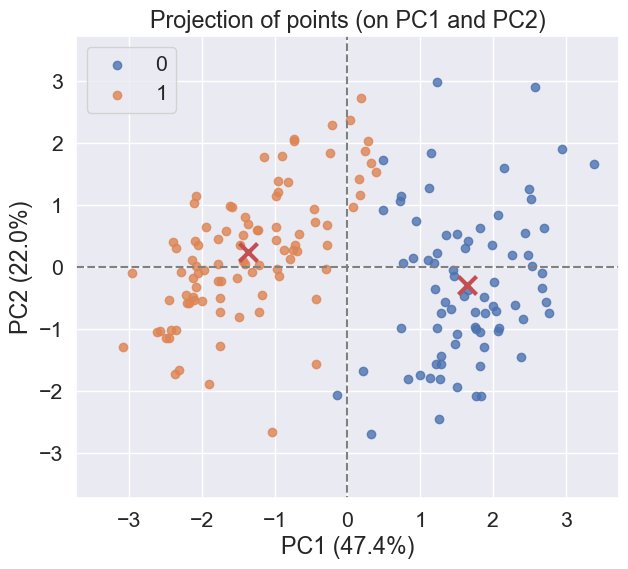

In [48]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

#### Clusters and Separation: The PCA visualization shows distinct clusters, indicating that the KMeans algorithm has effectively separated the different classes in the dataset.

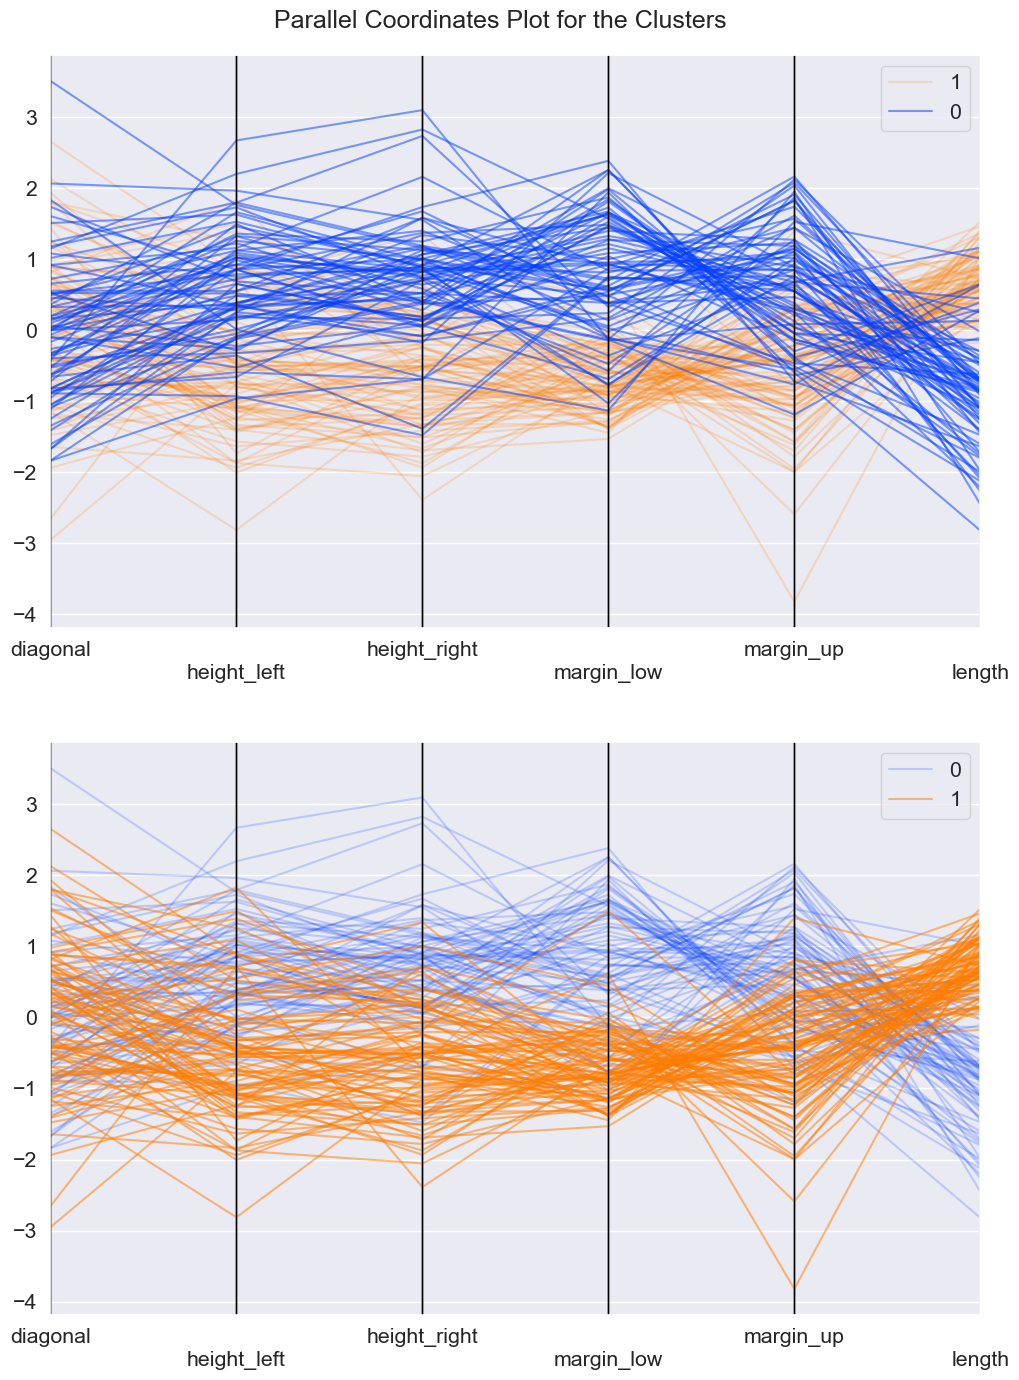

In [49]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 2)

### Display Parallel Coordinates Plot for the centroids

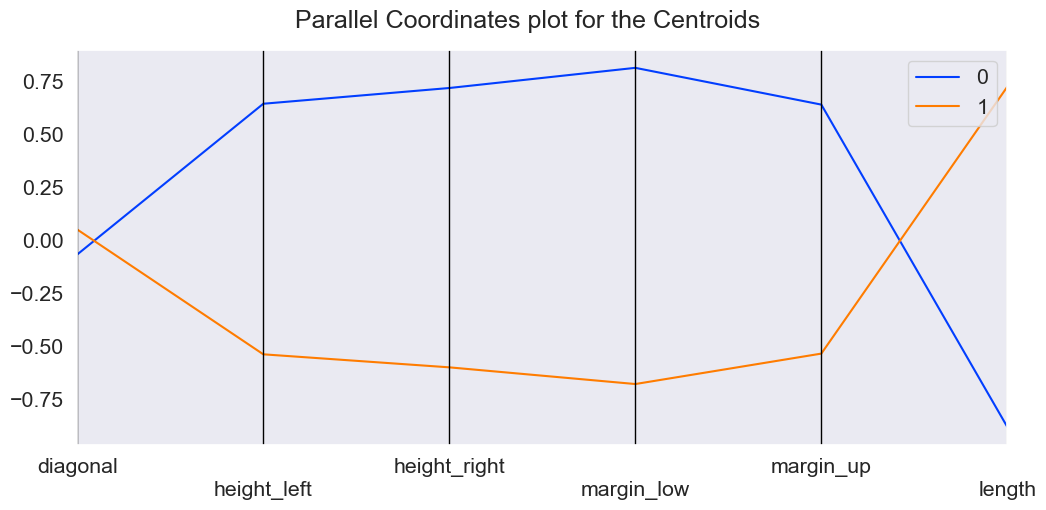

In [50]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

### Interpreting the meaning of k-means clusters boils down to characterizing the clusters. 

#### Cluster 0 (Blue Sample) has high rankings on height_left, height_right, margin_low, and margin_up.

#### Cluster 1 (Orange Sample) has high rankings on diagonal and length.

## Task 4 Model the Data
### Classification Model

### Logistic Regression

In [51]:
#### Statistical method for predicting binary classes.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
data = pd.read_csv("notes.csv")
data.shape

(170, 7)

In [53]:
#### The dataset has 170 samples of real and fake bills.

In [54]:
data.is_genuine.value_counts()

is_genuine
True     100
False     70
Name: count, dtype: int64

The outcome variable is binary of 100 real bills and 70 fake bills.

The predictors are these measurements: diagonal, length, bottom and top margins, right and left heights.

#### Splitting Data

In [55]:
#split dataset in features and target variable
feature_cols = ['diagonal','height_left','height_right','margin_low','margin_up','length']
X = data[feature_cols] # Features
y = data.is_genuine # Target variable

In [56]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

In [57]:
#### 70% data will be used for model training and 30% for model testing.

#### Model Development and Prediction

In [58]:
#importing logistic regression model
from sklearn.linear_model import LogisticRegression
 
#training the logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
 
#making predictions on test set
y_pred = classifier.predict(X_test)

In [59]:
print(accuracy_score(y_test, y_pred))

0.9607843137254902


In [60]:
# import the class
from sklearn.linear_model import LogisticRegression

# initiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# training the logistic regression model
logreg.fit(X_train, y_train)
# making predictons on test set
y_pred = logreg.predict(X_test)

#### Model Evaluation with Confusion Matrix

In [61]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[21,  2],
       [ 0, 28]], dtype=int64)

#### 21, 28 are accurate predictions, while 0, 2 are the incorrect predictions. 
From that table we can calculate the accuracy which is defined as the number of correctly classified samples over the total number of samples

Here the accuracy equals

In [62]:
accuracy = (21 + 28 ) / 51
print("Accuracy {:.2f}".format(accuracy))

Accuracy 0.96


### Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Text(0.5, 709.5555555555555, 'Predicted label')

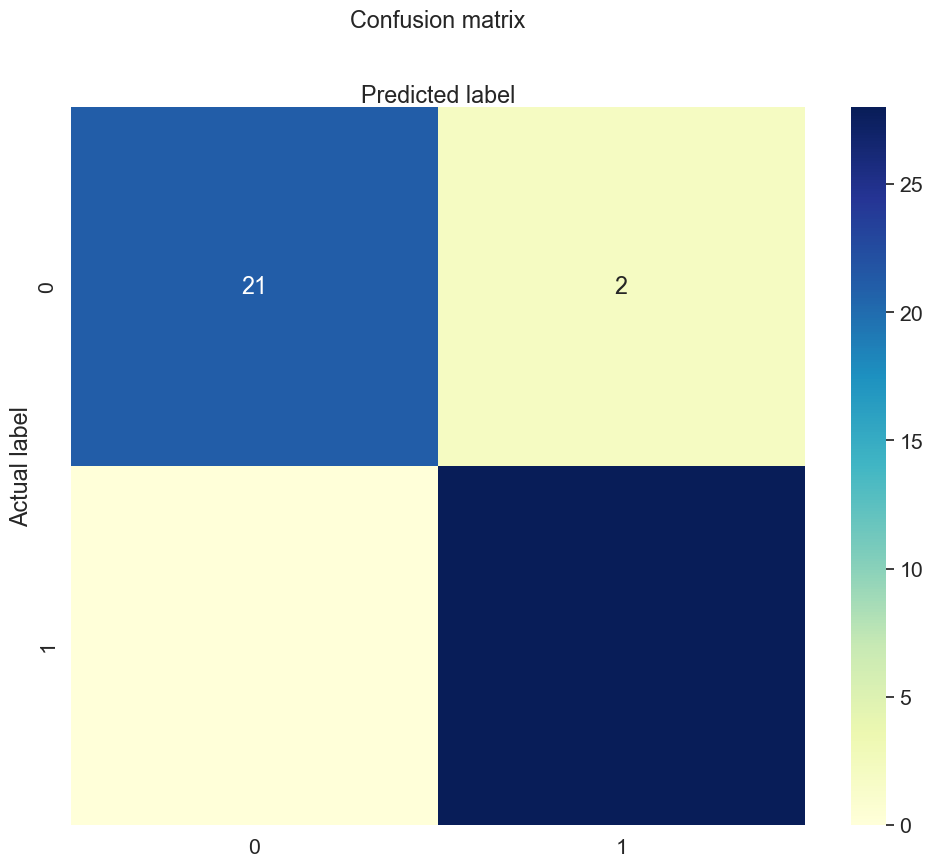

In [63]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Confusion Matrix Evaluation Metrics
Evaluates the performance of the logistic regression model used to detect counterfeit notes.

In [64]:
## generate a classification report.
from sklearn.metrics import classification_report
target_names = ['genuine', 'false']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     genuine       1.00      0.91      0.95        23
       false       0.93      1.00      0.97        28

    accuracy                           0.96        51
   macro avg       0.97      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



#### Accuracy: The model has an accuracy of 96%, meaning it correctly classifies 96% of the notes.
#### Precision: For false notes, the precision is 93%, indicating that when the model predicts a note is false, it is correct 93% of the time
#### Recall: The recall (number of positive results divided by number of samples) for false notes is 100%, meaning the model identifies all false notes in the test set

ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

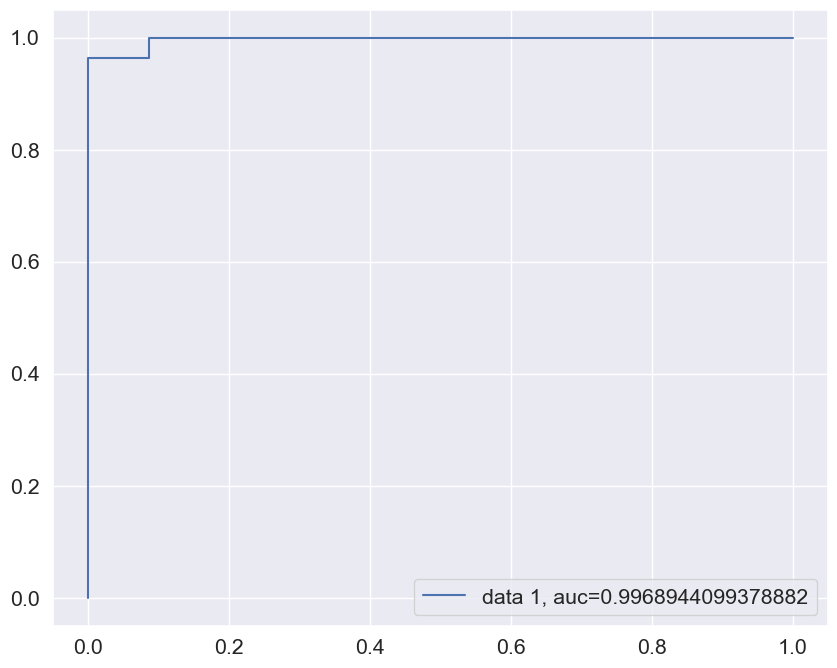

In [65]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### AUC (Area Under the Curve) score for the case is 0.99. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

### Test the notes

In [66]:
notes = pd.read_csv('example.csv')

In [67]:
def notes_test(csv):
    # Read the CSV file
    notes = pd.read_csv(csv)

    # Extract the 'id' column
    id_notes = notes["id"]

    # Extract the feature values from 'diagonal' to 'length'
    notes_val = notes.loc[:,"diagonal":"length"].values

    # Predict probabilities
    predictions = logreg.predict_proba(notes_val)

    # Print the results
    for i in range (len(notes)): print("notes {} : probability that the note is genuine = {}%".format(id_notes[i],round(((predictions[i][1])*100),2)))

In [68]:
notes_test('example.csv')

notes A_1 : probability that the note is genuine = 5.66%
notes A_2 : probability that the note is genuine = 2.02%
notes A_3 : probability that the note is genuine = 4.28%
notes A_4 : probability that the note is genuine = 87.81%
notes A_5 : probability that the note is genuine = 99.51%
